In [18]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def rle_decode(mask_rle, shape):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)

In [4]:
df = pd.read_csv('/data/steeve/DSB/data/__download__/stage1_solution.csv')
df.head()

,ImageId,EncodedPixels,Height,Width,Usage
0,0114f484a16c152baa2d82fdd43740880a762c93f436c8...,31632 6 31886 10 32139 14 32394 15 32649 17 32...,256,256,Public
1,0114f484a16c152baa2d82fdd43740880a762c93f436c8...,50280 7 50534 10 50788 13 51043 14 51298 16 51...,256,256,Public
2,0114f484a16c152baa2d82fdd43740880a762c93f436c8...,10892 5 11146 9 11401 10 11656 11 11911 13 121...,256,256,Public
3,0114f484a16c152baa2d82fdd43740880a762c93f436c8...,45104 8 45359 10 45614 12 45869 14 46124 15 46...,256,256,Public
4,0114f484a16c152baa2d82fdd43740880a762c93f436c8...,38564 4 38819 6 39074 8 39327 11 39582 12 3983...,256,256,Public


In [15]:
from tqdm import tqdm

In [77]:
last_id = df.iloc[0].ImageId
count = 0
for i in tqdm(range(len(df))):
    shape= (df.iloc[i].Height, df.iloc[i].Width)
    rle = df.iloc[i].EncodedPixels
    mask = rle_decode(rle,shape)
    current_id = df.iloc[i].ImageId
    current_dir = f'/data/steeve/DSB/data/__download__/stage1_test/{current_id}/masks/'
    if i == 0:
        os.makedirs( current_dir, exist_ok=True)
    if last_id == current_id:
        count +=1 
    else:
        count = 0
        os.makedirs( current_dir, exist_ok=True)
    h,w = shape
    img = np.zeros([h,w,3])
    for i in range(shape[0]):
        for j in range(shape[1]):
            if mask[i,j] == 0:
                img[i,j,:] = [0,0,0]
            else:
                img[i,j,:] = [255,255,255]
    img.astype(np.uint8)
    last_id = current_id
    cv2.imwrite(current_dir+f'{count}.png', img)


  5%|▍         | 198/4152 [01:05<21:54,  3.01it/s]

KeyboardInterrupt: 

In [94]:
rle = df.iloc[1].EncodedPixels
shape = (df.iloc[1].Height, df.iloc[1].Width)

In [95]:
mask  =rle_decode(rle,shape)

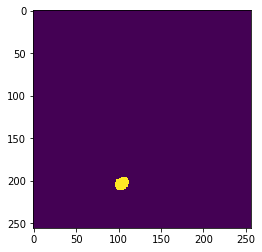

In [96]:
plt.imshow(mask)

In [87]:
img = cv2.imread('/data/steeve/DSB/data/__download__/stage1_test/0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5/images/0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5.png')

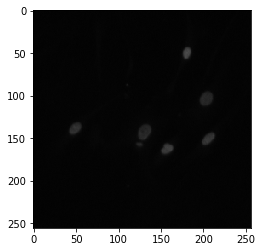

In [97]:
plt.imshow(img)

In [35]:
imshow

(256, 256, 3)

In [44]:
mask.max()

255

In [54]:
type(mask)

numpy.ndarray

In [82]:
h,w = mask.shape
img = np.zeros([h,w,3])

In [83]:
for i in range(h):
    for j in range(w):
        if mask[i,j] == 0:
            img[i,j,:] = [0,0,0]
        else:

            img[i,j,:] = [255,255,255]

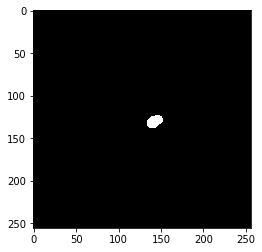

In [84]:
plt.imshow(img.astype(np.uint8))

In [69]:
img.max()

255.0

In [73]:
mask.dtype

dtype('uint8')

In [104]:
with open('/data/steeve/DSB/data/split/test1_ids_gray_only_53') as f:
    t_ids = [line.strip().split('/')[1] for line in f.readlines()]

In [105]:
for t_id in t_ids:
    img = cv2.imread(f'/data/steeve/DSB/data/image/stage1_test/images/{t_id}.png')
    w, h, c = img.shape
    if w < 256 or h < 256:
        print(t_id)

0999dab07b11bc85fb8464fc36c947fbd8b5d6ec49817361cb780659ca805eac
1962d0c5faf3e85cda80e0578e0cb7aca50826d781620e5c1c4cc586bc69f81a
336d3e4105766f8ad328a7ee9571e743f376f8cbcf6a969ca7e353fe3235c523
4f949bd8d914bbfa06f40d6a0e2b5b75c38bf53dbcbafc48c97f105bee4f8fac
a4816cc1fb76cb3c5e481186833fc0ae9cf426a1406a2607e974e65e9cddba4f
a984e7fb886aa02e29d112766d3ce26a4f78eac540ce7bbdbd42af2761928f6d
ca20076870e8fb604e61802605a9ac45419c82dd3e23404c56c4869f9502a5ef
d616d323a9eeb9da1b66f8d5df671d63c092c9919cb2c0b223e29c63257c944d
eea70a7948d25a9a791dbcb39228af4ea4049fe5ebdee9c04884be8cca3da835
